# Práctica 2 - Limpieza y análisis de los datos

## Contenido

* [Punto 1](#p1)
* [Punto 2](#p2)
* [Punto 3](#p3)
* [Punto 3.1](#p3.1)
* [Punto 3.2](#p3.2)
* [Punto 3.3](#p3.3)
* [Punto 4](#p4)
* [Punto 4.1](#p4.1)
* [Punto 4.2](#p4.2)
* [Punto 4.3](#p4.3)
* [Punto 5](#p5)
* [Punto 6](#p6)
* [Punto 7](#p7)
* [Contribuciones](#contribuciones)
* [Bibliografía](#bibliografia)

## 1. Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende responder? <a class="anchor" id="p1"></a>

Para esta práctica usaremos los datos de Red Wine Quality, winequality-red.csv, conjunto de datos que se puede descargar desde: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Vamos a estudiar la calidad del vino a partir de las diferentes medidas o propiedades obtenidas de prueba fisicoquímicas realizadas sobre diferentes muestras de vino. El conjunto de datos esta guardado en un archivo .csv: cada línea tiene información sobre una muestra de vino y las columnas representan:

&emsp;&emsp;1. **fixed acidity**          Acidez fija de la muestra

&emsp;&emsp;2. **volatile acidity**       Acidez volátil de la muestra

&emsp;&emsp;3. **citric acid**	            Acidez critica de la muestra

&emsp;&emsp;4. **residual sugar**	        Azúcar residual de la muestra

&emsp;&emsp;5. **chlorides**	            Cloruros de la muestra

&emsp;&emsp;6. **free sulfur dioxide**	    Dióxido de azufre libre de la muestra

&emsp;&emsp;7. **total sulfur dioxide**	Dióxido de azufre total de la muestra

&emsp;&emsp;8. **density**	                Densidad de la muestra

&emsp;&emsp;9. **pH**	                    pH de la muestra

&emsp;&emsp;10.  **sulphates**	            Sulfatos de la muestra

&emsp;&emsp;11. **alcohol**	                Alcohol de la muestra

&emsp;&emsp;12. **quality**	                Variable de clase con valores entre 0 y 10



## 2. Integración y selección de los datos de interés a analizar. Puede ser el resultado de adicionar diferentes datasets o una subselección útil de los datos originales, en base al objetivo que se quiera conseguir. <a class="anchor" id="p2"></a>

XXX

## 3. Limpieza de los datos <a class="anchor" id="p3"></a>

### Importar librerías necesarias

In [3]:
import pandas as pd # Pandas para manejo de datasets
import numpy as np # Importar Numpy para manejo de vectores
from scipy import stats # Scipy para utilizar funciones de detección de outliers
import math # math para funciones matemáticas
from skimpy import skim # para visualizar datos estadísticos de un dataset

# Importar librerías de gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

### Definición de constantes

In [18]:
EPSILON = 0.00001 # diferencia mínima aceptable

### Carga del CSV en un dataset de pandas

In [159]:
df = pd.read_csv("datasets/winequality-red.csv")

### Estructura del dataset y datos estadísticos generales

In [154]:
skim(df)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 1599   │ │ float64     │ 11    │                                    │
│ │ Number of columns │ 12     │ │ int64       │ 1     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃          ┃ missing ┃ complete ┃ mean  ┃ sd     ┃ p0    ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┃          ┃         ┃ rate     ┃       ┃        ┃       ┃      ┃      ┃      ┃        ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ fixed    │       0 │        1 │   8.3 │    1.7 │   4.6 │  7.1 │  9.2 │   16 │  ▁█▄▂  │  │
│ │ acidity  │         │          │       │        │       │      │      │      │        │  │
│ │ volatile │       0 │        1 │  0.53 │   0.18 │  0.12 │ 0.39 │ 0.64 │  1.6 │  ▃█▄▁  │  │
│ │ acidity  │         │          │       │        │       │      │      │      │        │  │
│ │ citric   │       0 │        1 │  0.27 │   0.19 │     0 │ 0.09 │ 0.42 │    1 │  █▇▆▃  │  │
│ │ acid     │         │          │       │        │       │      │      │      │        │  │
│ │ residual │       0 │        1 │   2.5 │    1.4 │   0.9 │  1.9 │  2.6 │   16 │   █▁   │  │
│ │ sugar    │         │          │       │        │       │      │      │      │        │  │
│ │ chloride │       0 │        1 │ 0.087 │  0.047 │ 0.012 │ 0.07 │ 0.09 │ 0.61 │   █▁   │  │
│ │ s        │         │          │       │        │       │      │      │      │        │  │
│ │ free     │       0 │        1 │    16 │     10 │     1 │    7 │   21 │   72 │  █▆▃▁  │  │
│ │ sulfur   │         │          │       │        │       │      │      │      │        │  │
│ │ dioxide  │         │          │       │        │       │      │      │      │        │  │
│ │ total    │       0 │        1 │    46 │     33 │     6 │   22 │   62 │  290 │  █▃▁   │  │
│ │ sulfur   │         │          │       │        │       │      │      │      │        │  │
│ │ dioxide  │         │          │       │        │       │      │      │      │        │  │
│ │ density  │       0 │        1 │     1 │ 0.0019 │  0.99 │    1 │    1 │    1 │  ▂█▇▂  │  │
│ │ pH       │       0 │        1 │   3.3 │   0.15 │   2.7 │  3.2 │  3.4 │    4 │  ▂█▅▁  │  │
│ │ sulphate │       0 │        1 │  0.66 │   0.17 │  0.33 │ 0.55 │ 0.73 │    2 │  ██▁   │  │
│ │ s        │         │          │       │        │       │      │      │      │        │  │
│ │ alcohol  │       0 │        1 │    10 │    1.1 │   8.4 │  9.5 │   11 │   15 │ ▃█▄▂▁  │  │
│ │ quality  │       0 │        1 │   5.6 │   0.81 │     3 │    5 │    6 │    8 │  ▁█▇▂  │  │
│ └──────────┴─────────┴──────────┴───────┴────────┴───────┴──────┴──────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

### Columnas deshechadas

Puesto que el dataset contiene una cantidad de columnas, vamos a proceder a ignorar aquellas que no tomaremos en cuenta en este trabajo, de cara a simplificar el proceso de tratamiento de datos y de análisis posterior.

Aquellas que no sean necesarias se eliminan del dataset: volatile acidity, free sulfur dioxide, total sulfur dioxide, fixed acidity, citric acid.

In [160]:
print("Antes: ",df.shape)
del df['volatile acidity']
del df['free sulfur dioxide']
del df['total sulfur dioxide']
del df['fixed acidity']
del df['citric acid']
print("Después: ",df.shape)

Antes:  (1599, 12)
Después:  (1599, 7)


### Distribución inicial de la variable de clase quality

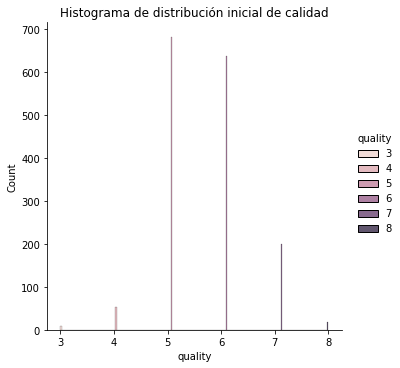

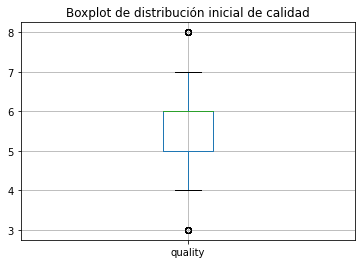

<Figure size 432x288 with 0 Axes>

In [161]:
# Distribución de la variable de clase 
sns.displot(df, x='quality', hue='quality', multiple="dodge")
plt.title("Histograma de distribución inicial de calidad")
plt.savefig(f'results/initial-histogram-quality.png')
plt.show()
plt.clf()

boxplot = df.boxplot(column=['quality'])
plt.title("Boxplot de distribución inicial de calidad")
plt.savefig("results/initial-boxplot-quality.png")
plt.show()
plt.clf()

Tal como se ve en el boxplot anterior, el juego de datos presenta elementos *outliers* que están por debajo y por encima de los datos aceptados por tres veces la desviación estándar. Como la variable es discreta, los elementos outliers están concentrados en los valores de 3 y 8.

### Distribución general de las variables al inicio

En el gráfico a cotinuación se muestra la distribución por pares entre todas las variables presentes en el dataset, mientras que en la diagonal principal, se ve la distribución de cada una de ellas.

Algo que puede destacarse es la tendencia de la distribución hacia la izquierda en prácticamente la totalidad de los casos. Puede apreciarse una aproximación a una distribución normal únicamente en los valores de pH y densidad, que hab rá que confirmar luego mediante una serie de tests.

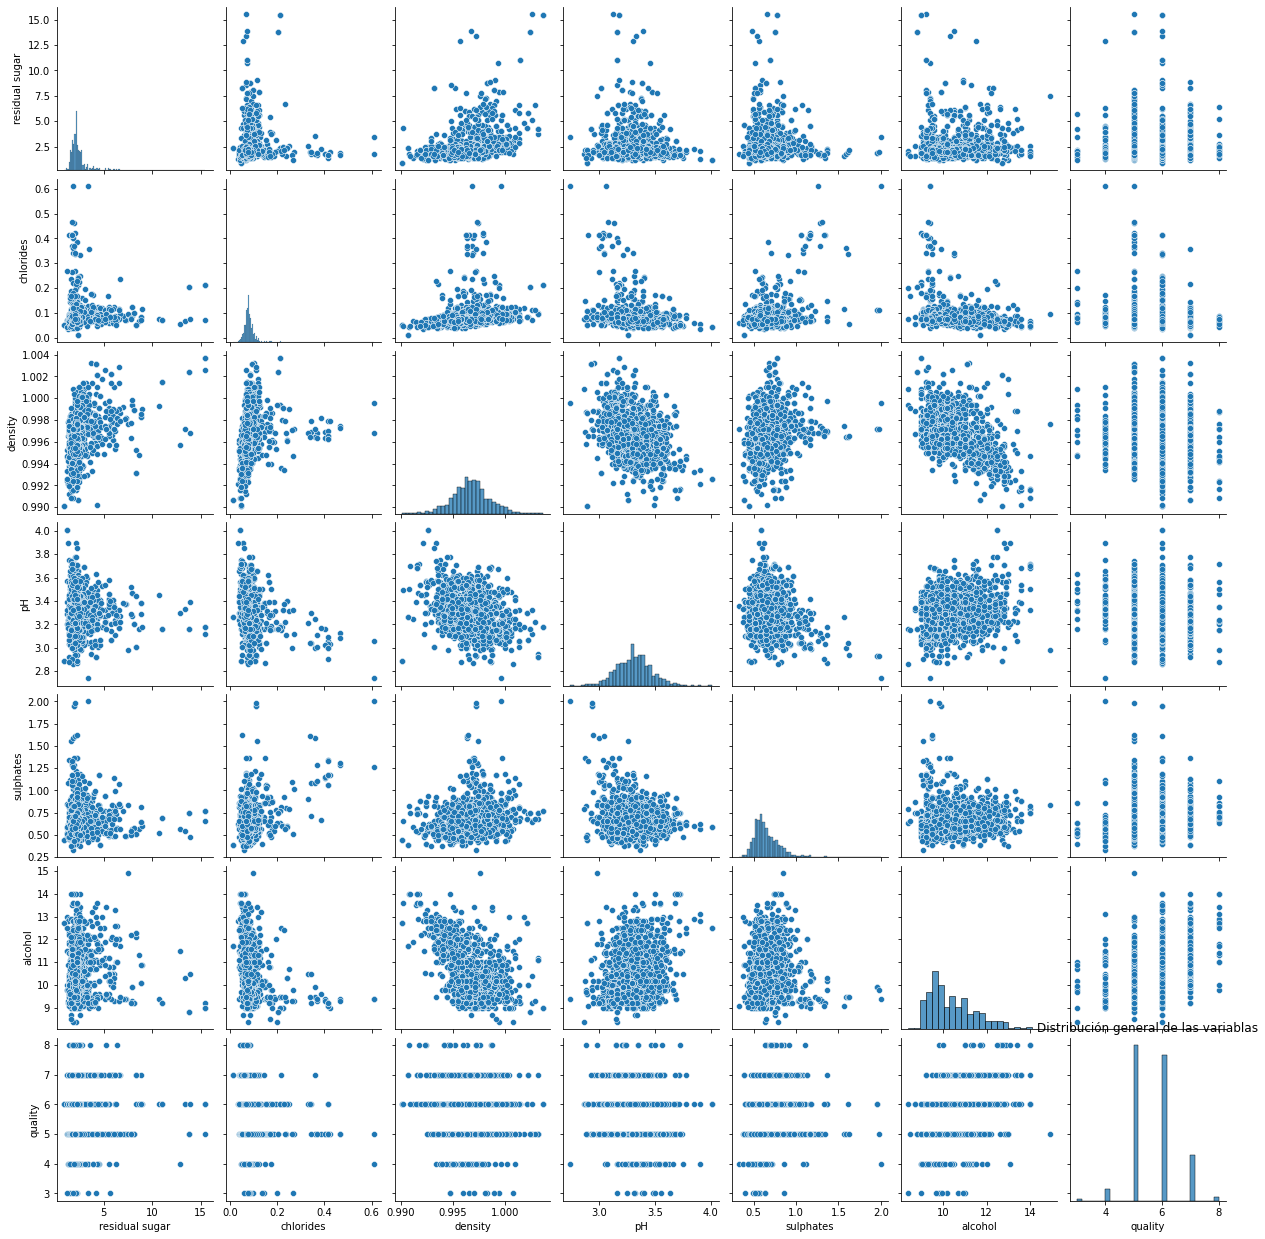

<Figure size 432x288 with 0 Axes>

In [162]:
g = sns.pairplot(df)
plt.title("Distribución general de las variablas")
plt.savefig(f"results/initial-general-distribution.png")
plt.show()
plt.clf()

### 3.1. ¿Los datos contienen ceros o elementos vacíos? Gestiona cada uno de estos casos. <a class="anchor" id="p3.1"></a>

Para poder gestionar estos valores, es necesario primero hacer algunas consultas al dataset previo a tomar decisiones.

### Estado inicial del dataset

In [163]:
rows, cols = df.shape
print(f"Filas: \t\t{rows}\nColumnas: \t{cols}")

Filas: 		1599
Columnas: 	7


### Tipos de las variables

In [164]:
print(df.dtypes)

residual sugar    float64
chlorides         float64
density           float64
pH                float64
sulphates         float64
alcohol           float64
quality             int64
dtype: object


### Cantidad de valores nulos por columnas

In [165]:
print(df.isna().sum())

residual sugar    0
chlorides         0
density           0
pH                0
sulphates         0
alcohol           0
quality           0
dtype: int64


Como puede verse en la información anterior, el dataset original elegido no cuenta con valores nulos o NA, aunque de todos modos, si a este dataset se le añadieran nuevas filas, se debería procesar y como definición de este equipo, se eliminan primero las columas que tengan la mitad más uno de sus datos faltantes. Luego, sí se eliminan las filas que pudieran tener datos faltantes. De esta manera y en este órden, si en un dataset de tres mil registros, una columa solo tiene dos valores, pasaríamos a eliminar 2998 registros; caso contrario, si elimiásemos la columna, luego se eliminarían aquellas filas que aún tengan valores NaN, que seguramente serían muchos menos.

### Se eliminan todas las columnas que tengan la mitad +1 de posiciones a None

In [166]:
min_nulls = (df.shape[1] /1) +1
df = df.dropna(axis=1, thresh=min_nulls)

### Se eliminan aquellas filas restantes que aún tengan valores a None

In [167]:
df = df.dropna()

### 3.2. Identifica y gestiona los valores extremos. <a class="anchor" id="p3.2"></a>

Se estudia la distribución de datos según su clase *quality*, previo a la eliminación de outliers.

In [168]:
print(pd.value_counts(df['quality'], sort = True))

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


En la tabla anterior se puede ver que las clases a y 8, tienen 10 y 18 registros aproximadamente, lo que difiere en gran medida con los demás registros, aunque pareciera tender a seguir una distribución normal.

Para eliminar los outliers, eliminaremos aquellos que superen dos veces y media la desviación estándar.

Nota: la teoría establece que deberían considerarse outliers aquellos que superen tres veces la desviación estándar, sin embargo para este caso particular, estos valores están dentro de ese margen de desviación.

In [169]:
df = df[(np.abs(stats.zscore(df['quality'])) < 2.5)]

Una vez eliminados los outliers, el resultado es la eliminación de aquellos registros que están en los extremos.

In [170]:
print(pd.value_counts(df['quality'], sort = True))

5    681
6    638
7    199
4     53
Name: quality, dtype: int64


### 3.3 Otros procesamientos <a class="anchor" id="p3.3"></a>

Se eliminan todas aquellas columnas que tengan el mismo valor, ya que se entiende que no aporta información alguna a los análisis posteriores.

In [171]:
df = df[[i for i in df if len(set(df[i]))>1]]

Previo a la normalización, analizaremos los rangos en los que se mueve cada variable utilizando las funciones min() y max(), que devuelven los valores mínimos y máximos por columnas, ignorando los NaN, que en este caso particular no hay.

In [172]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

df.apply(minMax)

,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
min,0.9,0.012,0.99007,2.74,0.33,8.4,4
max,15.5,0.611,1.00369,4.01,2.00,14.9,7


Puede verse en la tabla anterior, que algunos valores giran en el entorno de 0 a 1, mientras que otros van del 1 al 72. Por lo tanto, se decide aplicar una normalización min-max que permita escalar los valores a un rango de 0 a 1, unificando los valores que estos pueden tomar -por columnas-, a través de una transformación lineal.

Se toman para normalizar todas las columnas de tipo float - de la 1 a la 11- ignorando la última que es categórica con representación numérica. Luego, para cada índice, se normalizan todos sus datos.

In [173]:
cols_titles = df.columns[:-1]
for i in cols_titles:
    df[i] = (df[i] - df[i].min()) / ( df[i].max() - df[i].min())
df

,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
0,0.068493,0.106845,0.567548,0.606299,0.137725,0.153846,5
1,0.116438,0.143573,0.494126,0.362205,0.209581,0.215385,5
2,0.095890,0.133556,0.508811,0.409449,0.191617,0.215385,5
3,0.068493,0.105175,0.582232,0.330709,0.149701,0.215385,6
4,0.068493,0.106845,0.567548,0.606299,0.137725,0.153846,5
...,...,...,...,...,...,...,...
1594,0.075342,0.130217,0.354626,0.559055,0.149701,0.323077,5
1595,0.089041,0.083472,0.370778,0.614173,0.257485,0.430769,6
1596,0.095890,0.106845,0.416300,0.535433,0.251497,0.400000,6
1597,0.075342,0.105175,0.396476,0.653543,0.227545,0.276923,5


## 4. Análisis de los datos <a class="anchor" id="p4"></a>

### 4.1. Selección de los grupos de datos que se quieren analizar/comparar (p. e., si se van a comparar grupos de datos, ¿cuáles son estos grupos y qué tipo de análisis se van a aplicar?)<a class="anchor" id="p4.1"></a>

Para comenzar, se quiere conocer la relación que hay entre la acidez del vino y su calidad, por lo que es necesario cruzar los datos del pH y quality. Puesto que el pH es una variable cuantitativa, es necesario discretizarla en rangos de valores cuyos extremos equidisten en la ditribución.

Se divide el pH en dos rangos en función del nivel de acidez de la solución. Puesto que los valores son todos ácidos según se puede ver en la tabla de valores mínimos y máximos, se mueve entre los 2.74 y 4.01, una vez se ha estandarizado es necesario discretizar en cuatro rangos: 0-0.25, 0.25-0.5, 0.5-0.75 y 0.75-1.

Esta información es almacenada en la columna *pH_std*.

In [178]:
df['pH_std'] = pd.cut(df['pH'], bins=[0,0.25,0.5,0.75,1], right=True)
print(pd.value_counts(df['pH_std'], sort = True))

(0.25, 0.5]    991
(0.5, 0.75]    494
(0.0, 0.25]     69
(0.75, 1.0]     16
Name: pH_std, dtype: int64


Puede verse para los valores asignados al atributo quality, la cantidad de elementos presentes por rangos como se muestra en la leyenda de este gráfico.

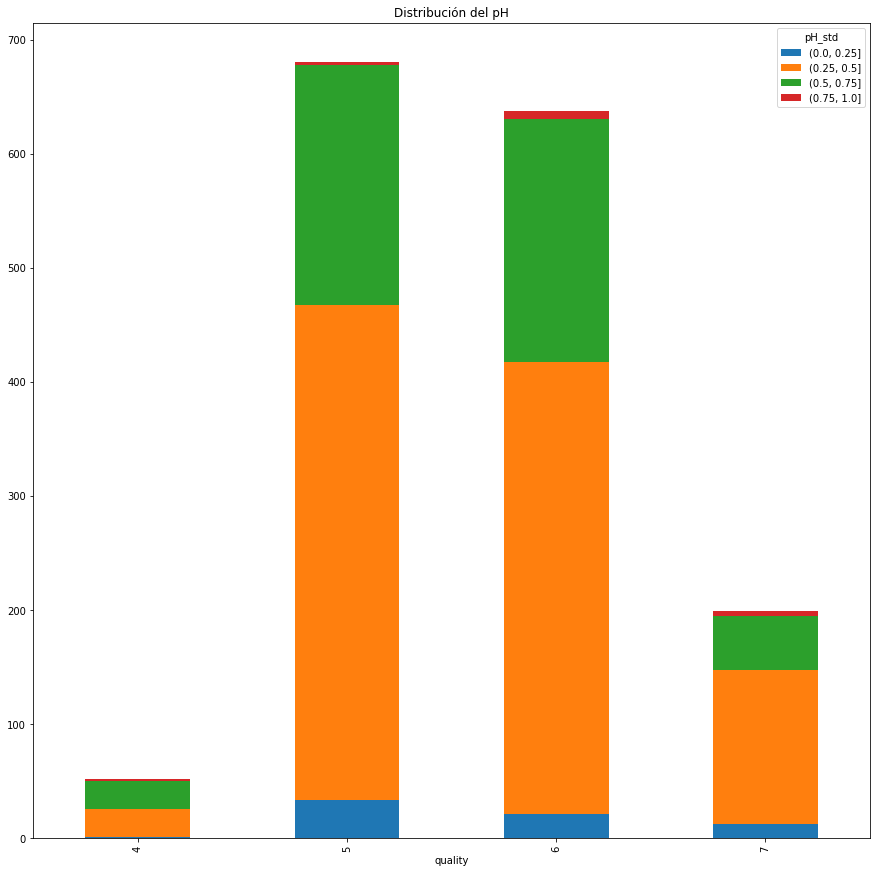

In [179]:
def stacked_bar(df: pd.DataFrame, index, columns, title):
    pivot_df = df[[index, columns]].pivot_table(index=index, columns=columns, aggfunc=len)
    pivot_df.plot.bar(stacked=True, figsize=(15, 15))
    plt.title(title)
    plt.show()
    
df['ph_rounded'] = df['pH'].round(20).astype('int')
stacked_bar(df, 'quality', 'pH_std', 'Distribución del pH')

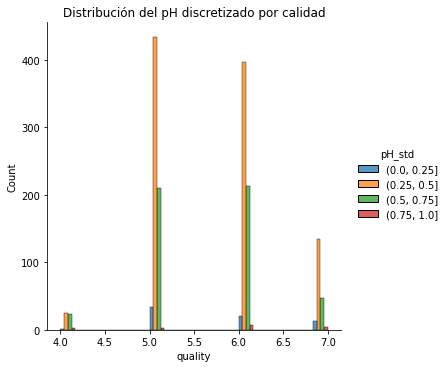

<Figure size 432x288 with 0 Axes>

In [184]:
sns.displot(df, x='quality', hue='pH_std', multiple="dodge")
plt.title("Distribución del pH discretizado por calidad")
plt.savefig(f'results/pH-discretizado.png')
plt.show()
plt.clf()

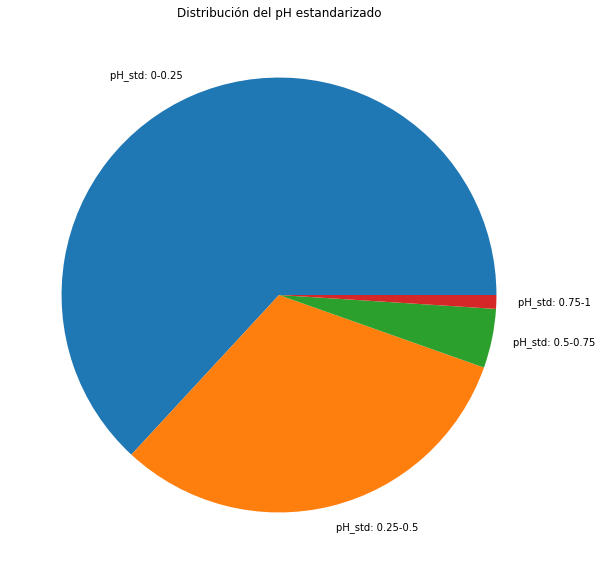

In [202]:
conteo = df['pH_std'].value_counts()
labels = ['pH_std: 0-0.25', 'pH_std: 0.25-0.5', 'pH_std: 0.5-0.75', 'pH_std: 0.75-1']
# Creating plot
fig = plt.figure(figsize =(10, 10))
plt.pie(conteo, labels = labels)
plt.title("Distribución del pH estandarizado")
 
# show plot
plt.show()

### Matriz de correlación entre variables

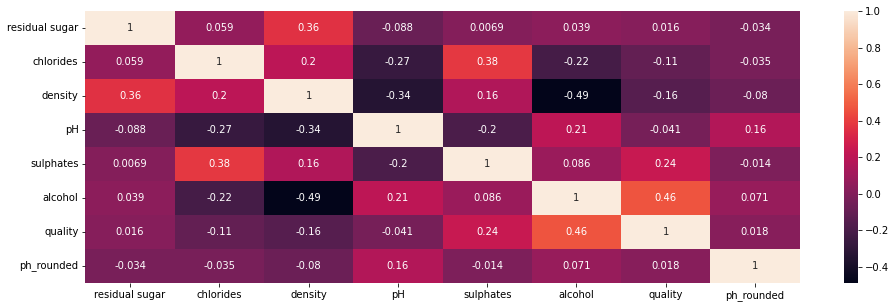

In [201]:
corr = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr, annot=True)
plt.show()

### 4.2. Comprobación de la normalidad y homogeneidad de la varianza.<a class="anchor" id="p4.2"></a>

Para el análisis de la homocedasticidad, se utilizará en este caso un *violinplot* que permite comprarar la dispersión de los grupos que se quieren evaluar. Aqí se compara la distribución del pH estandarizado (pH_std) en función del valor de la calidad de la columna de referencia *quality*.

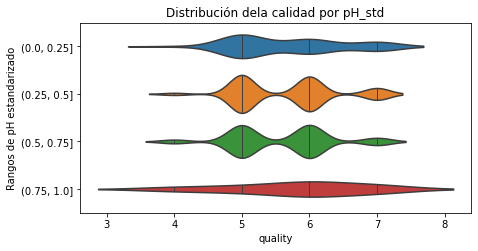

In [210]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.violinplot(
    x       = 'quality',
    y       = 'pH_std',
    data    = df,
    palette = 'tab10',
    inner   = 'stick',
    ax      = ax
)
ax.set_title('Distribución de la calidad por pH_std')
ax.set_xlabel('quality')
ax.set_ylabel('Rangos de pH estandarizado');

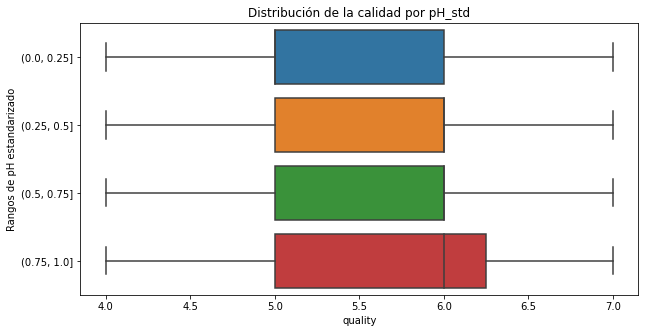

In [212]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.boxplot(
    x       = 'quality',
    y       = 'pH_std',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de la calidad por pH_std')
ax.set_xlabel('quality')
ax.set_ylabel('Rangos de pH estandarizado');

### 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.<a class="anchor" id="p4.3"></a>

## 5. Representación de los resultados a partir de tablas y gráficas. Este apartado se puede responder a lo largo de la práctica, sin necesidad de concentrar todas las representaciones en este punto de la práctica.<a class="anchor" id="p5"></a>

## 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?<a class="anchor" id="p6"></a>

## 7. Código: Hay que adjuntar el código, preferiblemente en R, con el que se ha realizado la limpieza, análisis y representación de los datos. Si lo preferís, también podéis trabajar en Python.<a class="anchor" id="p7"></a>

El código se ha desarrollado en Python, pudiendo accederse desde el repositorio GitHub cuyo enlace se adjunta a continuación. Además, se ha desarrollado sobre un Jupyter Notebook que permite la ejecución paso a paso, permitiendo trabajar con etapas del proyecto sin afectar el rendimiento de todo el script.

GitHub: 

## Contribuciones<a class="anchor" id="contribuciones"></a>

| Contribuciones | Firma |
|---|---|
| Investigación previa | DM, LD |
| Redacción de las respuestas | DM, LD |
| Desarrollo código | DM, LD |

## Bibliografía<a class="anchor" id="bibliografia"></a>

1. Calvo M., Subirats L., Pérez D. (2019). Introducción a la limpieza y análisis de los datos. Editorial UOC.
2. Conover, W. J., Johnson, M. E. and Johnson M. M. (1981). A comparative study of tests for homogeneity of variances, with applications to the outer continental shelf biding data. Technometrics, 23(4), 351-361.
3. Fligner, M.A. and Killeen, T.J. (1976). Distribution-free two-sample tests for scale. ‘Journal of the American Statistical Association.’ 71(353), 210-213.
4. Jason W. Osborne (2010). Data Cleaning Basics: Best Practices in Dealing with Extreme Scores. Newborn and Infant Nursing Reviews; 10 (1): pp. 1527-3369.
5. Jiawei Han, Micheine Kamber, Jian Pei (2012). Data mining: concepts and techniques. Morgan Kaufmann.
6. Levene, H. (1960). In Contributions to Probability and Statistics: Essays in Honor of Harold Hotelling, I. Olkin et al. eds., Stanford University Press, pp. 278-292.
7. Megan Squire (2015). Clean Data. Packt Publishing Ltd.
8. OpenIntro Statistics: Fourth Edition by David Diez, Mine Çetinkaya-Rundel, Christopher Barr https://amzn.to/3vVcwa4.
9. Peter Dalgaard (2008). Introductory statistics with R. Springer Science & Business Media.
10. Tutorial de Github https://guides.github.com/activities/hello-world.
11. Wes McKinney (2012). Python for Data Analysis. O’Reilley Media, Inc.